In [1]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
'''
1. Create a CSV file with the name, ‘term-test-1-result.csv’.
There’ll be three columns: ‘Registration Number’, ‘Name’, and ‘TT-1 Marks’.
You must include 50 students with their respective values for each column in the file.
'''
reg_numbers = []
for i in range(50):
    reg_numbers.append(2018731000+(i+1))
name = []
for i in range(50):
    name.append("Student_"+str(i+1))
tt_1 = np.random.randint(1,21,50)
df_1 = pd.DataFrame({
    'Registration Number': reg_numbers,
    'Name': name,
    'TT-1 Marks': tt_1 
})
df_1.to_csv('term-test-1-result.csv')

In [5]:
'''
2. Follow step 1 and create another CSV file with the name, ‘term-test-2-result.csv’.
‘Registration Number’, ‘Name’ columns will have the same values as mentioned in the
‘term-test-1-result.csv’ file. The value of the ‘TT-2 Marks’ column is most likely to be changed.
'''

tt_2 = np.random.randint(1,20,50)
df_2 = pd.DataFrame({
    'Registration Number': reg_numbers,
    'Name': name,
    'TT-2 Marks': tt_2
})
df_2.to_csv('term-test-2-result.csv')


In [7]:
'''
3. Load both the files in different pandas dataframes.
Make a new merged pandas dataframe on their ‘Registration Number’ column.
'''

df_tt1 = pd.read_csv('term-test-1-result.csv',index_col=False)
df_tt2 = pd.read_csv('term-test-2-result.csv',index_col=False)

merged_df = pd.merge(df_tt1, df_tt2, on='Registration Number', how='inner') 

merged_df.to_csv('merged_term_test_results.csv', index=False)
merged_df = merged_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y','Name_y'])
merged_df.rename(columns={'Name_x': 'Name'}, inplace=True)
merged_df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks
0,2018731001,Student_1,3,8
1,2018731002,Student_2,15,15
2,2018731003,Student_3,11,16
3,2018731004,Student_4,4,11
4,2018731005,Student_5,17,10


In [9]:
'''
4. Make a new column with the best term test marks for each student.
Make a new column with the average term test marks for each student.
'''
merged_df['Best Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)

merged_df['Average Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)
merged_df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks,Best Marks,Average Marks
0,2018731001,Student_1,3,8,8,5.5
1,2018731002,Student_2,15,15,15,15.0
2,2018731003,Student_3,11,16,16,13.5
3,2018731004,Student_4,4,11,11,7.5
4,2018731005,Student_5,17,10,17,13.5


In [11]:
'''
5. Drop both the columns named ‘TT-1 Marks’ and ‘TT-2 Marks’
'''
merged_df = merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'])
merged_df.head()

,Registration Number,Name,Best Marks,Average Marks
0,2018731001,Student_1,8,5.5
1,2018731002,Student_2,15,15.0
2,2018731003,Student_3,16,13.5
3,2018731004,Student_4,11,7.5
4,2018731005,Student_5,17,13.5


In [13]:
'''
6. Write the content of the latest pandas dataframe to a new CSV file named ‘final term test result.csv’.
'''
merged_df.to_csv('final term test result.csv', index=False)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

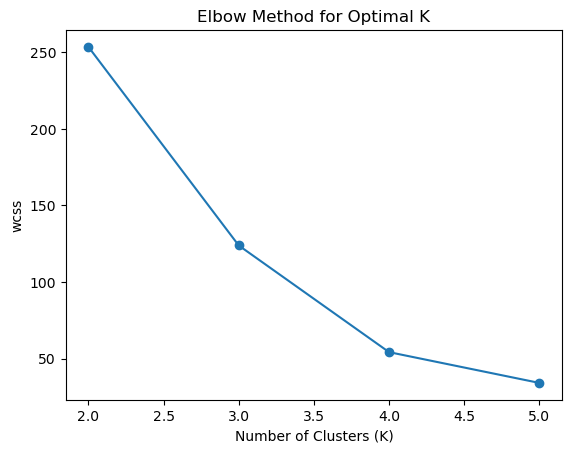

In [25]:
'''
7. Cluster the average marks of each student using K-Means clustering algorithm. (1<K<6) 
Visualize the final clusters. 
'''
wcss = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(merged_df[['Average Marks']])
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 6), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


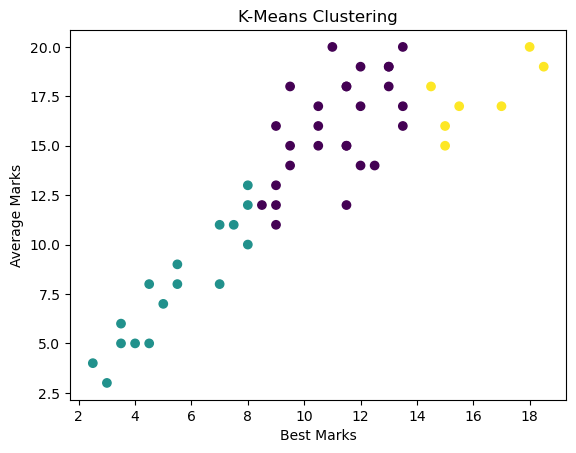

In [27]:
optimal_k = 3

kmeans = KMeans(n_clusters= optimal_k, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(merged_df[['Average Marks']])

plt.scatter(merged_df['Average Marks'], merged_df['Best Marks'], c=merged_df['Cluster'])
plt.xlabel('Best Marks')
plt.ylabel('Average Marks')
plt.title('K-Means Clustering')
plt.show()